In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
zoo=pd.read_csv("C:\\Users\\DELL\\Downloads\\DATASCIENCE ASSIGNMENTS\\Zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


# 1. Analyse the data using the visualizations

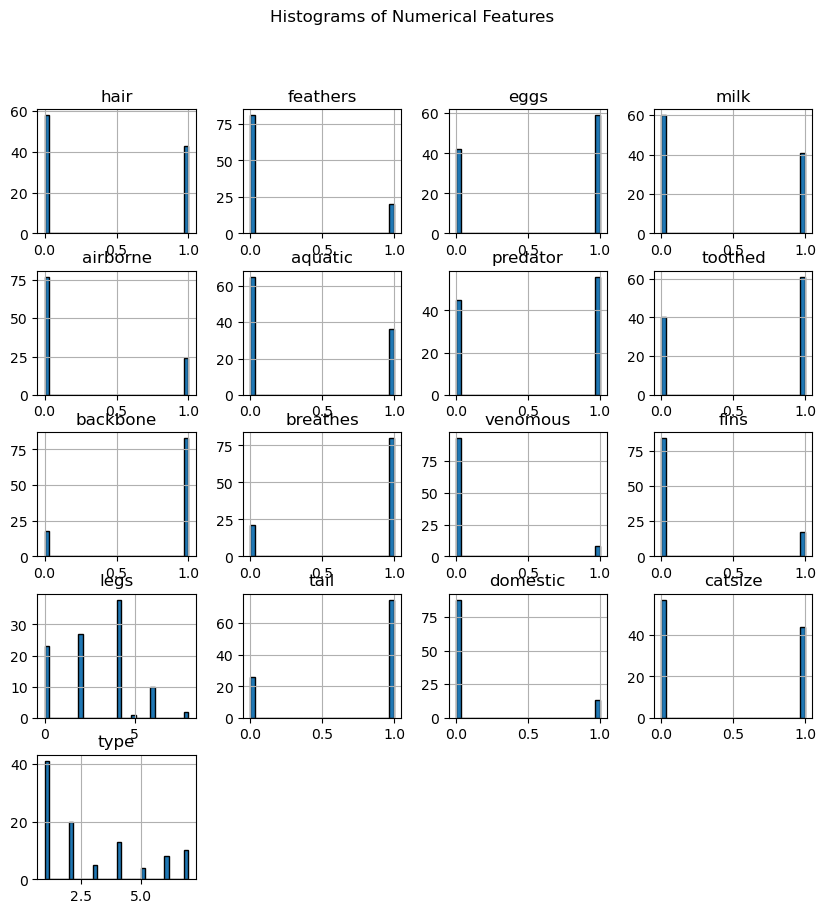

In [15]:
import matplotlib.pyplot as plt
#HISTOGRAM
zoo.hist(figsize=(10, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()


<Axes: >

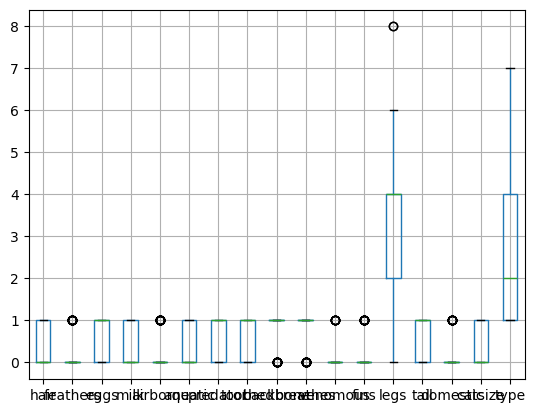

In [17]:
#box plot
zoo.boxplot()

# 2. Preprocess the data by handling missing values & Outliers, if any.

In [23]:
#missing values
zoo.isnull().sum().sum()

0

In [43]:
zoo_df=zoo.drop('animal name',axis=1)

# 3. Split the dataset into training and testing sets (80% training, 20% testing).

In [45]:
x=zoo_df.iloc[:,:-1]
y=zoo_df.iloc[:,-1]

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# 4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=4, metric='hamming')  
knn.fit(x_train, y_train)


KNeighborsClassifier(metric='hamming', n_neighbors=4)

In [86]:
y_pred = knn.predict(x_test)

In [88]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")
print("Classification Report:")
print(class_report)


Accuracy: 95.23809523809523
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



# Visualize the decision boundaries of the classifier.

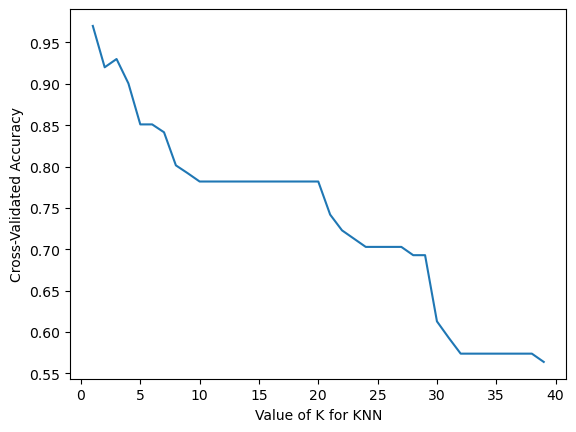

In [90]:
from sklearn.model_selection import cross_val_score
k_range = range(1, 40)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5,scoring='accuracy')
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Interview Questions:

# 1. What are the key hyperparameters in KNN?

The main hyperparameter to tune in k-nearest neighbors is k, the number of neighbors to consider. Other parameters include distance metrics, weights, and algorithm types.

# 2. What distance metrics can be used in KNN?

Commonly used distance metrics for optimizing K-Nearest Neighbors  algorithms include Euclidean distance, Manhattan distance, Minkowski distance, and Cosine similarity.